**0. Import the relevant libraries and packages** 

In [107]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 999

**Code by:** 

Santiago Guardo & Ricardo Pizarro

**Supervision:** 

Ricardo Pizarro and Silvia Lopez

# 1. Input

We need the parameters (alpha and beta) for gains AND losses from the utility model. 
-  These can be retrieved using participant's data and running the model. 
-  Or, with ADO algorithm

We haven't specified alpha and beta for the loses for the IDM data. However, there is code to retrieve them when that data becomes available

In [108]:
#Specify the data pathway
#participant_code = input ("")
path = '/Volumes/UCDN/datasets/IDM/'
#path= input('')
participant_code = '23_IDM_0021'
print('the Participant Code is ' + participant_code)
 #MAC path to the File share
participant_split_dir = os.path.join(path,'split') 
participant_trials = os.path.join(participant_split_dir,'{}/crdm/{}_crdm.csv').format(participant_code,participant_code) #This is the psychopy output CSV

#Path to the utility model data
utility_dir = os.path.join(path,'utility')
utility_analysis = os.path.join(utility_dir,'split_CRDM_analysis.csv')
parameters = pd.read_csv(utility_analysis)
amb_options = [0.24, 0.5, 0.74]

print('loading fn: {}'.format(participant_trials))
print('loading fn: {}'.format(utility_analysis))

the Participant Code is 23_IDM_0021
loading fn: /Volumes/UCDN/datasets/IDM/split/23_IDM_0021/crdm/23_IDM_0021_crdm.csv
loading fn: /Volumes/UCDN/datasets/IDM/utility/split_CRDM_analysis.csv


In [109]:
trials = pd.read_csv(participant_trials)
p_options = trials['crdm_lott_p'].unique()/100
p_options = p_options[~np.isnan(p_options)]  # Remove nan values ~is a logical NOT operator
p_options = p_options.tolist()  # Do we want p_options to be an array or a list? Ask Ricardo 
p_options = sorted(p_options, reverse=True)
#From the CRDM_analysis CSV we pick our patient's parameters
filtered_parameters = parameters[parameters['subject'] == participant_code]

# Create pos, comb, neg parameters and read them from the csv
alpha = filtered_parameters['alpha'].values[0]
beta = filtered_parameters['beta'].values[0]
#alpha_pos = filtered_parameters.loc[filtered_parameters['domain'] == 'gain', 'alpha'].values[0]
#alpha_comb = filtered_parameters.loc[filtered_parameters['domain'] == 'combined', 'alpha'].values[0]
#alpha_neg = filtered_parameters.loc[filtered_parameters['domain'] == 'loss', 'alpha'].values[0]


#beta_pos = filtered_parameters.loc[filtered_parameters['domain'] == 'gain', 'beta'].values[0]
#beta_comb = filtered_parameters.loc[filtered_parameters['domain'] == 'combined', 'beta'].values[0]
#beta_neg = filtered_parameters.loc[filtered_parameters['domain'] == 'loss', 'beta'].values[0]

print('alpha', alpha)
print('beta',beta)

#print("alpha_pos:", alpha_pos)
#print("alpha_combined:", alpha_comb)
#print("alpha_neg:", alpha_neg)

#print("\nbeta_pos:", beta_pos)
#print("beta_combined:", beta_comb)
#print("beta_neg:", beta_neg)

#Declare the variables
alpha_pos = alpha #Participant's or ADO alpha parameter
beta_pos = beta #Participant's or ADO beta parameter
# beta_max = 1.3513513513513513
alpha_neg = 1.01*alpha_pos
beta_neg = 1.2*beta_pos
# A= df['crdm_amb_lev'].values[0] #Ambiguity level
A_null = 0.0 # no ambiguity
Vmax = 50.0 #The maximum amount we can pay to participants
Vmin = -50.0 #The minimum amount we can take from participants
Vsafe_pos = 5.0 # The old safe option in positive trials
Vsafe_neg = -5.0 # The old safe option in negative trials

#SV calculation and our probabilities options
# sv_pos = Vsafe_pos**alpha_pos
# sv_neg = -(abs(Vsafe_neg))**alpha_neg

# used for populating trials
empty_df = pd.DataFrame([],columns=['category','p_reward', 'value_reward'])

alpha 0.4953238541107437
beta 0.2216801711568682


In [110]:
#This function plots the participant's input data for Gains

def calculate_sv_gains(alpha, beta,): #Define a function to plot SV given participant's input
    A = 0 
    p_options = [1.0, 0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13] #We want a line for every probability level. The 1.0 is the classic (non risky) utility function
    v = np.linspace(0, 50, 100) # The x axis goes from 0 to 50 an takes 100 points (just to make the figure smooth)
    
    plt.figure(figsize=(10, 6)) #Create a plot figure
    for p in p_options: #Iterate through each probability level
        sv = (p - beta * A / 2) * v**alpha #Calculate the SV of every V from 0 to 50 for a given p
        if p == 1.0:  #Non risky 
            plt.plot(v, sv, label=f'p = {p}', linestyle='--', color='black') #If p=0, plot a black dashed line using V as X and SV as Y
        else:
            plt.plot(v, sv, label=f'p = {p}')

    plt.xlabel('Value of Reward')
    plt.ylabel('SV')
    plt.title("Participant's SV model for Gains")
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_sv_losses(alpha_loss, beta_loss,): #Define a function to plot SV given participant's input
    A = 0 
    p_options = [1.0, 0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13] #We want a line for every probability level. The 1.0 is the classic (non risky) utility function
    v = np.linspace(0, -50, 100) # The x axis goes from 0 to 50 an takes 100 points (just to make the figure smooth)
    
    plt.figure(figsize=(10, 6)) #Create a plot figure
    for p in p_options: #Iterate through each probability level
        sv = (p - beta_loss * A / 2)* -abs(v)**alpha_loss #Calculate the SV of every V from 0 to 50 for a given p
        if p == 1.0:  #Non risky 
            plt.plot(v, sv, label=f'p = {p}', linestyle='--', color='black') #If p=0, plot a black dashed line using V as X and SV as Y
        else:
            plt.plot(v, sv, label=f'p = {p}')

    plt.xlabel('Value of Reward')
    plt.ylabel('SV')
    plt.title("Participant's SV model for Losses")
    plt.legend()
    plt.grid(True)
    plt.show()

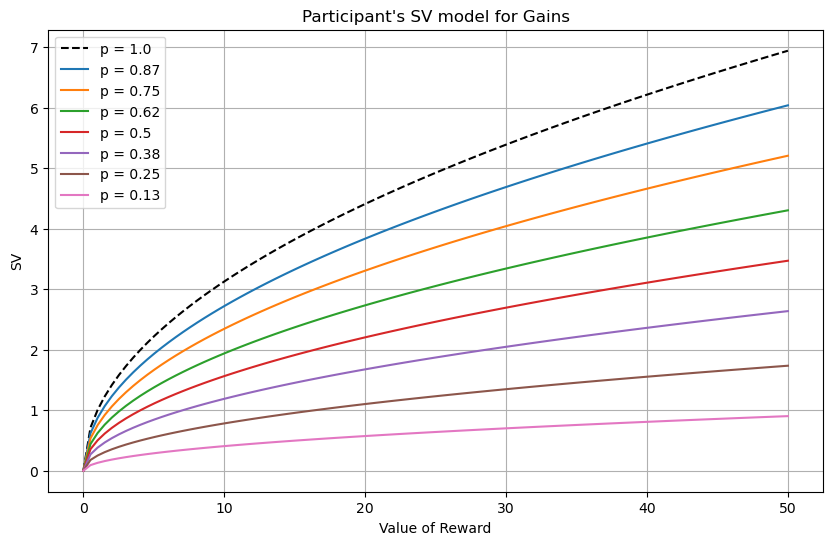

In [111]:
calculate_sv_gains(alpha_pos, beta_pos)

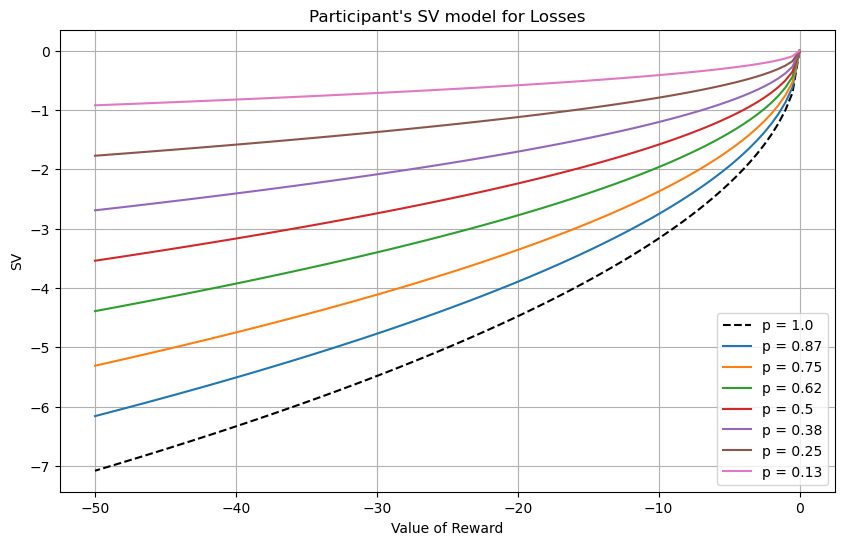

In [112]:
calculate_sv_losses(alpha_neg, beta_neg)

# 2. Creating the choice set
From the Subjective Value formula, we can calculate new values:
# $SV = (p - \beta \cdot \frac{A}{2}) \cdot V^\alpha$ --->  $V = \left(\frac{SV}{p-\frac{\beta A}{2}}\right)^\frac{1}{\alpha}$






**For each probability level:**
- We want to make 3 trials around the point of subjective equality. 

- We want 2 extreme trials. 
  -  Winning $50 for each probability level
  -  Loosing $50 for each probability level
  - 

- We want 4 intermediate trials.  


In [113]:
#Create the extreme positive gains and losses

def get_extreme(p_options,trials='gains'):
    extr = {} #Create an empty dict
    V = Vmax
    if trials=='losses': #If trials are losses, assign them -50
        V = Vmin
    for p in p_options: #Iterate through the probability levels
        extr[p] = V #Assign them the 50 dollars value
    return extr

extrpos = get_extreme(p_options)
print('Gain trials with the maximum Reward: \n', extrpos)

extrneg = get_extreme(p_options,trials='losses')
print('\nLoss trials with the maximum loss: \n', extrneg)



Gain trials with the maximum Reward: 
 {0.75: 50.0, 0.5: 50.0, 0.38: 50.0, 0.25: 50.0, 0.13: 50.0}

Loss trials with the maximum loss: 
 {0.75: -50.0, 0.5: -50.0, 0.38: -50.0, 0.25: -50.0, 0.13: -50.0}


In [114]:
#From the dictionaries, we create DataFrames to work with
def get_extr_df(extr_dict,trials='gains'):
    df_app = pd.DataFrame(extr_dict.items(), columns=['p_reward', 'value_reward'])
    Extr_df = pd.concat([empty_df, df_app], ignore_index=True)
    category = 'Extr_pos'
    if trials=='losses':
        category = 'Extr_neg'
    Extr_df['category'] = category
    Extr_df['ambiguity'] = A_null
    return Extr_df

def add_ambig_extr(df,amb_options,Vmax=50,prob_amb=0.50,trials='gains'):
    amb_dict = {prob_amb:amb_options}
    df_app = pd.DataFrame(amb_dict.items(), columns=['p_reward', 'ambiguity'])
    df_app = df_app.explode('ambiguity')
    df_app['category'] = df['category']
    df_app['value_reward'] = Vmax
    df = pd.concat([df,df_app],ignore_index=True)
    return df

# df_app = pd.DataFrame(centrials_neg.items(), columns=['p_reward', 'value_reward'])
# df_app = df_app.explode('value_reward')

#We define a function to calculate the SV of the trials given the 
#participant's alpha and beta

def append_SVreward(df,alpha,beta,trials='gains'):
    Amp = 1.0
    if trials == 'losses':
        Amp = -1.0
    df['SV_reward'] = (df['p_reward'] - beta*df['ambiguity']/2)*Amp*(abs(df['value_reward']))**alpha
    return df

#We define a function to calculate the SV of the safe options of the trials given the 
#participant's alpha and beta

def append_Vsafe(df,alpha,beta,trials='gains'): 
    Amp = 1.0
    if trials == 'losses':
        Amp = -1.0
    df['SV_New_Safe'] = 0.5*df['SV_reward']
    df['value_lott_SE'] = Amp*(abs(df['SV_New_Safe']) / (df['p_reward']-beta*df['ambiguity']/2)) ** (1 / alpha)
    df['value_safe'] = Amp*(abs(df['SV_New_Safe'])) ** (1 / alpha)
    return df

#Define the data frames
df_pos = get_extr_df(extrpos)
df_pos = add_ambig_extr(df_pos,amb_options)

df_neg = get_extr_df(extrneg,trials='losses')
df_neg = add_ambig_extr(df_neg,amb_options,Vmax=Vmin,trials='losses')


#Add the SV of reward and safe trials
df_pos = append_SVreward(df_pos,alpha_pos,beta_pos)
df_neg = append_SVreward(df_neg,alpha_neg,beta_neg,trials='losses')

df_pos = append_Vsafe(df_pos,alpha_pos,beta_pos)
df_neg = append_Vsafe(df_neg,alpha_neg,beta_neg,trials='losses')

df_pos

,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_lott_SE,value_safe
0,Extr_pos,0.75,50.0,0.0,5.207169,2.603584,12.337473,6.902235
1,Extr_pos,0.50,50.0,0.0,3.471446,1.735723,12.337473,3.044265
2,Extr_pos,0.38,50.0,0.0,2.638299,1.319149,12.337473,1.74928
3,Extr_pos,0.25,50.0,0.0,1.735723,0.867861,12.337473,0.751171
4,Extr_pos,0.13,50.0,0.0,0.902576,0.451288,12.337473,0.200624
5,Extr_pos,0.50,50.0,0.24,3.286754,1.643377,12.337473,2.726137
6,Extr_pos,0.50,50.0,0.5,3.08667,1.543335,12.337473,2.401479
7,Extr_pos,0.50,50.0,0.74,2.901978,1.450989,12.337473,2.120219


In [115]:
df_neg

,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_lott_SE,value_safe
0,Extr_neg,0.75,-50.0,0.0,-5.309053,-2.654526,-12.509602,-7.038894
1,Extr_neg,0.50,-50.0,0.0,-3.539368,-1.769684,-12.509602,-3.129803
2,Extr_neg,0.38,-50.0,0.0,-2.68992,-1.34496,-12.509602,-1.808324
3,Extr_neg,0.25,-50.0,0.0,-1.769684,-0.884842,-12.509602,-0.783052
4,Extr_neg,0.13,-50.0,0.0,-0.920236,-0.460118,-12.509602,-0.211891
5,Extr_neg,0.50,-50.0,0.24,-3.313401,-1.656701,-12.509602,-2.743123
6,Extr_neg,0.50,-50.0,0.5,-3.068604,-1.534302,-12.509602,-2.352966
7,Extr_neg,0.50,-50.0,0.74,-2.842637,-1.421318,-12.509602,-2.019359


In [116]:
# Safe option dataframe to use when merging multiple dataframes
df_safe_pos = df_pos[['p_reward','ambiguity','SV_New_Safe','value_lott_SE','value_safe']].copy()
df_safe_neg = df_neg[['p_reward','ambiguity','SV_New_Safe','value_lott_SE','value_safe']].copy()
df_safe_pos

,p_reward,ambiguity,SV_New_Safe,value_lott_SE,value_safe
0,0.75,0.0,2.603584,12.337473,6.902235
1,0.50,0.0,1.735723,12.337473,3.044265
2,0.38,0.0,1.319149,12.337473,1.74928
3,0.25,0.0,0.867861,12.337473,0.751171
4,0.13,0.0,0.451288,12.337473,0.200624
5,0.50,0.24,1.643377,12.337473,2.726137
6,0.50,0.5,1.543335,12.337473,2.401479
7,0.50,0.74,1.450989,12.337473,2.120219


In [117]:
#Define the trials of subjective equality

#For gains
df_SE_pos = df_pos[['category','p_reward','ambiguity','value_lott_SE', 'SV_New_Safe']].copy()
df_SE_pos['category'] = 'SE_pos'
df_SE_pos = df_SE_pos.rename(columns={'value_lott_SE':'value_reward'})
#df_SE_pos = append_SVreward(df_SE_pos,alpha_pos,beta_pos)
df_SE_pos['value_safe'] = df_safe_pos['value_safe']
df_SE_pos = df_SE_pos.rename(columns={'SV_New_Safe':'SV_reward'})
#df_SE_pos = df_SE_pos.drop(columns=['SV_New_Safe','value_lott_SE'])

df_SE_pos

,category,p_reward,ambiguity,value_reward,SV_reward,value_safe
0,SE_pos,0.75,0.0,12.337473,2.603584,6.902235
1,SE_pos,0.50,0.0,12.337473,1.735723,3.044265
2,SE_pos,0.38,0.0,12.337473,1.319149,1.74928
3,SE_pos,0.25,0.0,12.337473,0.867861,0.751171
4,SE_pos,0.13,0.0,12.337473,0.451288,0.200624
5,SE_pos,0.50,0.24,12.337473,1.643377,2.726137
6,SE_pos,0.50,0.5,12.337473,1.543335,2.401479
7,SE_pos,0.50,0.74,12.337473,1.450989,2.120219


In [118]:

#For losses
df_SE_neg = df_neg[['category','p_reward','ambiguity','value_lott_SE', 'SV_New_Safe']].copy()
df_SE_neg['category'] = 'SE_neg'
df_SE_neg = df_SE_neg.rename(columns={'value_lott_SE':'value_reward'})
#df_SE_pos = append_SVreward(df_SE_pos,alpha_pos,beta_pos)
df_SE_neg['value_safe'] = df_safe_neg['value_safe']
df_SE_neg = df_SE_neg.rename(columns={'SV_New_Safe':'SV_reward'})
#df_SE_pos = df_SE_pos.drop(columns=['SV_New_Safe','value_lott_SE'])

df_SE_neg

,category,p_reward,ambiguity,value_reward,SV_reward,value_safe
0,SE_neg,0.75,0.0,-12.509602,-2.654526,-7.038894
1,SE_neg,0.50,0.0,-12.509602,-1.769684,-3.129803
2,SE_neg,0.38,0.0,-12.509602,-1.34496,-1.808324
3,SE_neg,0.25,0.0,-12.509602,-0.884842,-0.783052
4,SE_neg,0.13,0.0,-12.509602,-0.460118,-0.211891
5,SE_neg,0.50,0.24,-12.509602,-1.656701,-2.743123
6,SE_neg,0.50,0.5,-12.509602,-1.534302,-2.352966
7,SE_neg,0.50,0.74,-12.509602,-1.421318,-2.019359


In [119]:
#Centered around SE

#For gains
df_cent_pos= df_SE_pos.copy()

df_cent_pos['category'] = 'Cent_SE_pos'
#df_cent_pos = append_SVreward(df_cent_pos,alpha_pos,beta_pos)
#df_cent_pos = pd.merge(df_cent_pos,df_safe_pos,on='p_reward')

#New dfs
df_adjusted_pos = df_cent_pos.copy()
df_adjusted_pos['value_reward'] = df_adjusted_pos['value_reward'] +2.0

df_adjusted_neg = df_cent_pos.copy()
df_adjusted_neg['value_reward'] = df_adjusted_neg['value_reward'] - 2.0
df_cent_pos = pd.concat([df_cent_pos, df_adjusted_pos, df_adjusted_neg], ignore_index=True)

#Centered around SE DF
df_cent_pos = append_SVreward(df_cent_pos,alpha_pos,beta_pos)

#For losses
#For gains
df_cent_neg= df_SE_neg.copy()

df_cent_neg['category'] = 'Cent_SE_neg'
#df_cent_pos = append_SVreward(df_cent_pos,alpha_pos,beta_pos)
#df_cent_pos = pd.merge(df_cent_pos,df_safe_pos,on='p_reward')

#New dfs
df1_adjusted_pos = df_cent_neg.copy()
df1_adjusted_pos['value_reward'] = df1_adjusted_pos['value_reward'] +2.0

df1_adjusted_neg = df_cent_neg.copy()
df1_adjusted_neg['value_reward'] = df1_adjusted_neg['value_reward'] - 2.0
df_cent_neg = pd.concat([df_cent_neg, df1_adjusted_pos, df1_adjusted_neg], ignore_index=True)

#Centered around SE DF
df_cent_neg = append_SVreward(df_cent_neg,alpha_neg,beta_neg,trials='losses')


In [120]:
df_cent_neg 

,category,p_reward,ambiguity,value_reward,SV_reward,value_safe
0,Cent_SE_neg,0.75,0.0,-12.509602,-2.654526,-7.038894
1,Cent_SE_neg,0.50,0.0,-12.509602,-1.769684,-3.129803
2,Cent_SE_neg,0.38,0.0,-12.509602,-1.34496,-1.808324
3,Cent_SE_neg,0.25,0.0,-12.509602,-0.884842,-0.783052
4,Cent_SE_neg,0.13,0.0,-12.509602,-0.460118,-0.211891
5,Cent_SE_neg,0.50,0.24,-12.509602,-1.656701,-2.743123
6,Cent_SE_neg,0.50,0.5,-12.509602,-1.534302,-2.352966
7,Cent_SE_neg,0.50,0.74,-12.509602,-1.421318,-2.019359
8,Cent_SE_neg,0.75,0.0,-10.509602,-2.432974,-7.038894
9,Cent_SE_neg,0.50,0.0,-10.509602,-1.621983,-3.129803


In [121]:
df_cent_pos

,category,p_reward,ambiguity,value_reward,SV_reward,value_safe
0,Cent_SE_pos,0.75,0.0,12.337473,2.603584,6.902235
1,Cent_SE_pos,0.50,0.0,12.337473,1.735723,3.044265
2,Cent_SE_pos,0.38,0.0,12.337473,1.319149,1.74928
3,Cent_SE_pos,0.25,0.0,12.337473,0.867861,0.751171
4,Cent_SE_pos,0.13,0.0,12.337473,0.451288,0.200624
5,Cent_SE_pos,0.50,0.24,12.337473,1.643377,2.726137
6,Cent_SE_pos,0.50,0.5,12.337473,1.543335,2.401479
7,Cent_SE_pos,0.50,0.74,12.337473,1.450989,2.120219
8,Cent_SE_pos,0.75,0.0,14.337473,2.804721,6.902235
9,Cent_SE_pos,0.50,0.0,14.337473,1.869814,3.044265


In [122]:
df_int_temp = df_pos.copy()
df_int_temp['category'] = 'Int_pos'
def get_interm(df,df_safe_pos,beta,alpha,num_steps=2, trials = 'gains'):
    Amp = 1.0
    if trials == 'losses':
        Amp = -1.0
    dfreturn = pd.DataFrame([], columns = list(df))
    df['SVrange'] = df['SV_reward'] - df['SV_New_Safe']
    df['SVstep'] =  df['SVrange']/(num_steps+1)
    list_x = [i for i in range(-num_steps-1,num_steps+1) if i != 0]
    
    for x in list_x:
        dfint = df[['category', 'p_reward','ambiguity']].copy()
        if x == -num_steps-1:
            dfint['category'] = 'Zero_Reward'
        dfint['SV_reward'] = df['SV_New_Safe'] + x*df['SVstep']
        dfint['value_reward'] = Amp*(abs(dfint['SV_reward']) / (dfint['p_reward']-beta*dfint['ambiguity']/2)) ** (1 / alpha)
        dfint = pd.merge(dfint,df_safe_pos,on=['p_reward','ambiguity'])
        dfreturn= pd.concat([dfreturn,dfint],ignore_index=True)

    return dfreturn

df_int_pos = get_interm(df_int_temp, df_safe_pos, beta_pos,alpha_pos, num_steps=2)
df_int_pos

,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_lott_SE,value_safe
0,Zero_Reward,0.75,0.0,0.0,0.0,2.603584,12.337473,6.902235
1,Zero_Reward,0.50,0.0,0.0,0.0,1.735723,12.337473,3.044265
2,Zero_Reward,0.38,0.0,0.0,0.0,1.319149,12.337473,1.74928
3,Zero_Reward,0.25,0.0,0.0,0.0,0.867861,12.337473,0.751171
4,Zero_Reward,0.13,0.0,0.0,0.0,0.451288,12.337473,0.200624
5,Zero_Reward,0.50,0.0,0.24,0.0,1.643377,12.337473,2.726137
6,Zero_Reward,0.50,0.0,0.5,0.0,1.543335,12.337473,2.401479
7,Zero_Reward,0.50,0.0,0.74,0.0,1.450989,12.337473,2.120219
8,Int_pos,0.75,1.342688,0.0,0.867861,2.603584,12.337473,6.902235
9,Int_pos,0.50,1.342688,0.0,0.578574,1.735723,12.337473,3.044265


In [123]:
df_intneg_temp = df_neg.copy()
df_intneg_temp['category'] = 'Int_neg'
df_int_neg = get_interm(df_intneg_temp, df_safe_neg, beta_neg,alpha_neg, num_steps=2,trials='losses')
df_int_neg

,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_lott_SE,value_safe
0,Zero_Reward,0.75,-0.0,0.0,0.0,-2.654526,-12.509602,-7.038894
1,Zero_Reward,0.50,-0.0,0.0,0.0,-1.769684,-12.509602,-3.129803
2,Zero_Reward,0.38,-0.0,0.0,0.0,-1.34496,-12.509602,-1.808324
3,Zero_Reward,0.25,-0.0,0.0,0.0,-0.884842,-12.509602,-0.783052
4,Zero_Reward,0.13,-0.0,0.0,0.0,-0.460118,-12.509602,-0.211891
5,Zero_Reward,0.50,-0.0,0.24,0.0,-1.656701,-12.509602,-2.743123
6,Zero_Reward,0.50,-0.0,0.5,0.0,-1.534302,-12.509602,-2.352966
7,Zero_Reward,0.50,-0.0,0.74,0.0,-1.421318,-12.509602,-2.019359
8,Int_neg,0.75,-1.391648,0.0,-0.884842,-2.654526,-12.509602,-7.038894
9,Int_neg,0.50,-1.391648,0.0,-0.589895,-1.769684,-12.509602,-3.129803


# concat three dataframes
CentTrials trials centered around Subjective Equality
ExtrPos trials in the extreme where value reward is $50
IntPor trials in between along range (SE and SVmax)

In [124]:
df_Trials_gains = pd.concat([df_pos,df_int_pos,df_cent_pos],ignore_index=True)
df_Trials_gains['SV_New_Safe'] = df_Trials_gains['value_safe']**alpha_pos
df_Trials_gains['deltaSV'] = df_Trials_gains['SV_reward'] - df_Trials_gains['SV_New_Safe']
df_Trials_gains = df_Trials_gains.drop(columns=['value_lott_SE'])
# df_Trials_gains = df_Trials_gains.round(2)
df_Trials_gains


,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_safe,deltaSV
0,Extr_pos,0.75,50.0,0.0,5.207169,2.603584,6.902235,2.603584
1,Extr_pos,0.50,50.0,0.0,3.471446,1.735723,3.044265,1.735723
2,Extr_pos,0.38,50.0,0.0,2.638299,1.319149,1.74928,1.319149
3,Extr_pos,0.25,50.0,0.0,1.735723,0.867861,0.751171,0.867861
4,Extr_pos,0.13,50.0,0.0,0.902576,0.451288,0.200624,0.451288
5,Extr_pos,0.50,50.0,0.24,3.286754,1.643377,2.726137,1.643377
6,Extr_pos,0.50,50.0,0.5,3.08667,1.543335,2.401479,1.543335
7,Extr_pos,0.50,50.0,0.74,2.901978,1.450989,2.120219,1.450989
8,Zero_Reward,0.75,0.0,0.0,0.0,2.603584,6.902235,-2.603584
9,Zero_Reward,0.50,0.0,0.0,0.0,1.735723,3.044265,-1.735723


In [125]:
crdm_trials_gains = 'csv/crdm_trials_gains.csv'

# Save the filtered DataFrame to a new CSV file
df_Trials_gains.to_csv(crdm_trials_gains, float_format='%0.2f',index=False)

print(f"CSV file filtered successfully.")
df = pd.read_csv(crdm_trials_gains)
df

CSV file filtered successfully.


,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_safe,deltaSV
0,Extr_pos,0.75,50.000000,0.00,5.207169,2.603584,6.902235,2.603584e+00
1,Extr_pos,0.50,50.000000,0.00,3.471446,1.735723,3.044265,1.735723e+00
2,Extr_pos,0.38,50.000000,0.00,2.638299,1.319149,1.749280,1.319149e+00
3,Extr_pos,0.25,50.000000,0.00,1.735723,0.867861,0.751171,8.678614e-01
4,Extr_pos,0.13,50.000000,0.00,0.902576,0.451288,0.200624,4.512879e-01
5,Extr_pos,0.50,50.000000,0.24,3.286754,1.643377,2.726137,1.643377e+00
6,Extr_pos,0.50,50.000000,0.50,3.086670,1.543335,2.401479,1.543335e+00
7,Extr_pos,0.50,50.000000,0.74,2.901978,1.450989,2.120219,1.450989e+00
8,Zero_Reward,0.75,0.000000,0.00,0.000000,2.603584,6.902235,-2.603584e+00
9,Zero_Reward,0.50,0.000000,0.00,0.000000,1.735723,3.044265,-1.735723e+00


In [126]:
df_Trials_losses = pd.concat([df_neg,df_cent_neg, df_int_neg],ignore_index=True)
df_Trials_losses['SV_New_Safe'] = -abs(df_Trials_gains['value_safe'])**alpha_pos
df_Trials_losses['deltaSV'] = df_Trials_losses['SV_reward'] - df_Trials_losses['SV_New_Safe']
df_Trials_losses = df_Trials_losses.drop(columns=['value_lott_SE'])
# df_Trials_losses = df_Trials_losses.round(2)
df_Trials_losses

,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_safe,deltaSV
0,Extr_neg,0.75,-50.0,0.0,-5.309053,-2.603584,-7.038894,-2.705468
1,Extr_neg,0.50,-50.0,0.0,-3.539368,-1.735723,-3.129803,-1.803646
2,Extr_neg,0.38,-50.0,0.0,-2.68992,-1.319149,-1.808324,-1.370771
3,Extr_neg,0.25,-50.0,0.0,-1.769684,-0.867861,-0.783052,-0.901823
4,Extr_neg,0.13,-50.0,0.0,-0.920236,-0.451288,-0.211891,-0.468948
5,Extr_neg,0.50,-50.0,0.24,-3.313401,-1.643377,-2.743123,-1.670025
6,Extr_neg,0.50,-50.0,0.5,-3.068604,-1.543335,-2.352966,-1.525269
7,Extr_neg,0.50,-50.0,0.74,-2.842637,-1.450989,-2.019359,-1.391648
8,Cent_SE_neg,0.75,-12.509602,0.0,-2.654526,-2.603584,-7.038894,-0.050942
9,Cent_SE_neg,0.50,-12.509602,0.0,-1.769684,-1.735723,-3.129803,-0.033961


In [127]:
crdm_trials_losses = 'csv/crdm_trials_losses.csv'

# Save the filtered DataFrame to a new CSV file
df_Trials_losses.to_csv(crdm_trials_losses, float_format='%.2f',index=False)

print(f"CSV file filtered successfully.")
pd.read_csv(crdm_trials_losses)

CSV file filtered successfully.


,category,p_reward,value_reward,ambiguity,SV_reward,SV_New_Safe,value_safe,deltaSV
0,Extr_neg,0.75,-50.000000,0.00,-5.309053,-2.603584,-7.038894,-2.705468
1,Extr_neg,0.50,-50.000000,0.00,-3.539368,-1.735723,-3.129803,-1.803646
2,Extr_neg,0.38,-50.000000,0.00,-2.689920,-1.319149,-1.808324,-1.370771
3,Extr_neg,0.25,-50.000000,0.00,-1.769684,-0.867861,-0.783052,-0.901823
4,Extr_neg,0.13,-50.000000,0.00,-0.920236,-0.451288,-0.211891,-0.468948
5,Extr_neg,0.50,-50.000000,0.24,-3.313401,-1.643377,-2.743123,-1.670025
6,Extr_neg,0.50,-50.000000,0.50,-3.068604,-1.543335,-2.352966,-1.525269
7,Extr_neg,0.50,-50.000000,0.74,-2.842637,-1.450989,-2.019359,-1.391648
8,Cent_SE_neg,0.75,-12.509602,0.00,-2.654526,-2.603584,-7.038894,-0.050942
9,Cent_SE_neg,0.50,-12.509602,0.00,-1.769684,-1.735723,-3.129803,-0.033961


# Visualization

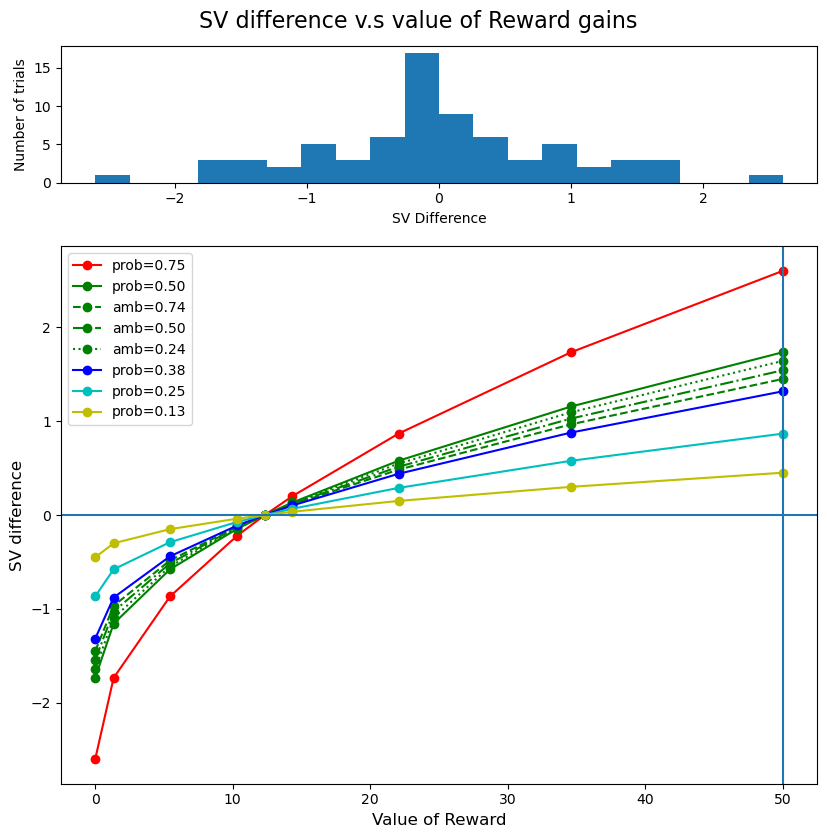

In [128]:
from matplotlib.gridspec import GridSpec
import sys

def scatter_hist(x, y, ax, ax_histy,xlabel='',ylabel='',title=''): #This functions creates a scatter plot with histograms at its sides
	#ax.scatter(x, y)
	ax.set_xlabel(xlabel,fontsize=12) #Creates the subplots
	ax.set_ylabel(ylabel,fontsize=12)
	plt.suptitle(title,fontsize=16, ha='center')
	#ax_histx.hist(x,bins=20)
	ax_histy.hist(y, bins=20)
	ax_histy.set_xlabel('SV Difference')
	ax_histy.set_ylabel('Number of trials')
	plt.tight_layout()


def setup_fig_ax():  #Setting the axis

	fig = plt.figure(figsize=(8.5,8.5))
	gs = GridSpec(4, 3)

	ax = fig.add_subplot(gs[1:4, 0:3])
	ax_histy = fig.add_subplot(gs[0,0:3])
	#ax_histx = fig.add_subplot(gs[1:4, 3])
	#ax_histx.tick_params(axis="x", labelbottom=False)
	ax_histy.tick_params(axis="y")
 	
	#Adjust spacing around subplots
	#plt.subplots_adjust(top=1.4, bottom=0.15, left=0.15, right=0.9)
	
	return ax, ax_histy

def plot_scatter_hist(df,xvline=50,trials='gains'):

	# delta SV v.s value_reward
	x,y = df['value_reward'],df['deltaSV'] 
	ax,ax_histy = setup_fig_ax()

	scatter_hist(x,y,ax,ax_histy,  
		xlabel='Value of Reward',
		ylabel= 'SV difference',
		title= 'SV difference v.s value of Reward {}'.format(trials))

	colors = ['r','g','b','c','y','m','k']
	amb_line = ['--','-.',':']
	df = df.sort_values('value_reward')

	for i,p in enumerate(reversed(sorted(df['p_reward'].unique()))): #A scatter plot for each probability level
		df_p = df.loc[(df['p_reward']==p) & (df['ambiguity']==A_null)]
		x,y = df_p['value_reward'],df_p['deltaSV']
		ax.plot(x, y,'{}o-'.format(colors[i]),label='prob={0:0.2f}'.format(p)) #The plot conecting prob levels
		if p==0.50:
			for j,A in enumerate(reversed(sorted(df['ambiguity'].unique()))):
				if A==0:
					continue
				df_A = df.loc[(df['p_reward']==p) & (df['ambiguity']==A)]
				x,y = df_A['value_reward'],df_A['deltaSV']
				ax.plot(x, y,'{0}o{1}'.format(colors[i],amb_line[j]),label='amb={0:0.2f}'.format(A)) #The plot conecting prob levels
				
		

	# ax.plot([50],[],'r-')
	ax.axvline(x=xvline)
	# ax.plot([-50,-50],[-10,10],'r-')
	ax.axhline(y=0)
	# ax.plot([0,50],[0,0],'k--')
	ax.legend(loc="upper left")

plot_scatter_hist(df_Trials_gains,xvline=50)



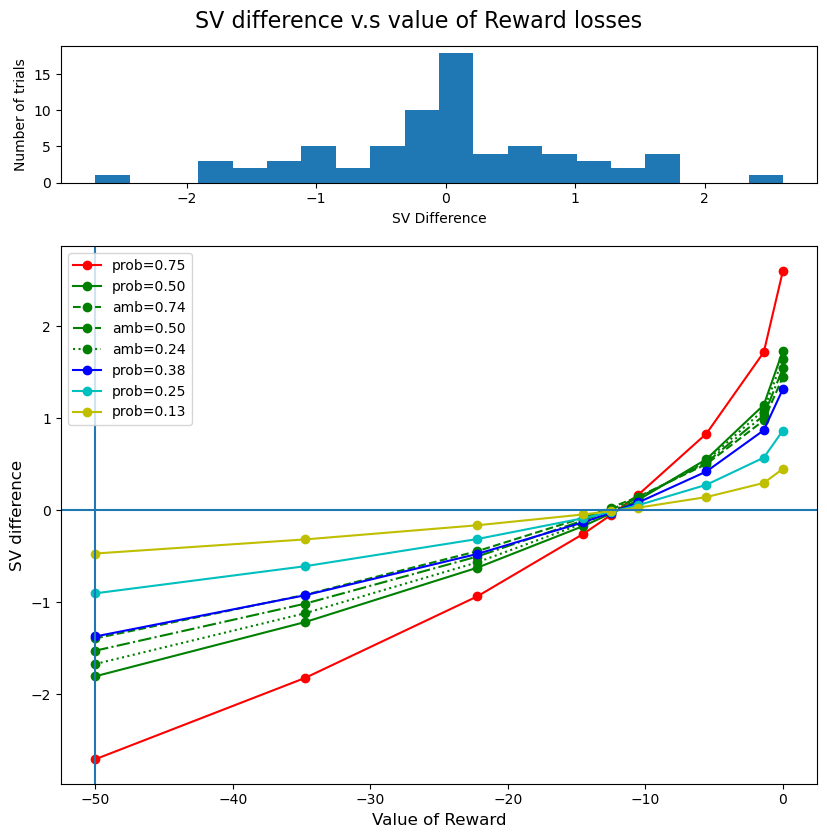

In [129]:
plot_scatter_hist(df_Trials_losses,xvline=-50,trials='losses')